# Car Price Prediction with Machine Learning


### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

### Importing Neccessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Loading a Dataset

In [2]:
df=pd.read_csv("car data.csv")

### EDA (Exploratory Data Analysis)

### Insepecting the First 5 rows of the Dataset 

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Checking the number pf rows and columns 

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

### Checking the number of owners

In [6]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

### Checking the null values in the Dataframe

In [7]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Checking the Statistical information about Dataset.

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Getting information about the Dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Checking The distribution of categorical data

In [10]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding The Categorical Data

### Encoding "Fuel_Type","Selling_type","Transmission" Columns

In [11]:
df.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({"Selling_type":{'Dealer':0,'Individual':1}},inplace=True)
df.replace({"Transmission":{'Manual':0,'Automatic':1,}},inplace=True)
df['Car_Name'].replace(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
                                's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
                                '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
                                'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
                                'camry', 'land cruiser', 'Royal Enfield Thunder 500',
                                'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
                                'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
                                'Royal Enfield Thunder 350', 'KTM 390 Duke ',
                                'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
                                'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
                                'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
                                'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
                                'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
                                'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
                                'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
                                'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
                                'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ',
                                'Honda Dream Yuga ', 'Bajaj Avenger Street 220',
                                'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
                                'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS',
                                'Activa 4g', 'Honda CB Unicorn', 'Hero Honda CBZ extreme',
                                'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
                                'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
                                'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego',
                                'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor',
                                'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc',
                                'Hero  CBZ Xtreme', 'Bajaj  ct 100', 'i20', 'grand i10', 'i10',
                                'eon', 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio',
                                'amaze', 'jazz'],[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,                                                
                                                  11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                                                  21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                                                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                                                  41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                                                  51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
                                                  61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
                                                  71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
                                                  81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
                                                  91, 92, 93, 94,95,96,97],inplace=True)

C:\Users\shriv\AppData\Local\Temp\ipykernel_11436\2338258831.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\shriv\AppData\Local\Temp\ipykernel_11436\2338258831.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Selling_type":{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\shriv\AppData\Local\Temp\ipykernel_11436\2338258831.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,0,2014,3.35,5.59,27000,0,0,0,0
1,1,2013,4.75,9.54,43000,1,0,0,0
2,2,2017,7.25,9.85,6900,0,0,0,0
3,3,2011,2.85,4.15,5200,0,0,0,0
4,4,2014,4.60,6.87,42450,1,0,0,0


## Splitting the Dataset

In [13]:
x = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [14]:
x.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,0,2014,5.59,27000,0,0,0,0
1,1,2013,9.54,43000,1,0,0,0
2,2,2017,9.85,6900,0,0,0,0
3,3,2011,4.15,5200,0,0,0,0
4,4,2014,6.87,42450,1,0,0,0


In [15]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Splitting Traning and Test Data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.1, random_state=2)

## Model Training

### 1.Linear Regression

In [17]:
#Loading the linear Regression Model
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

## Model Evalution

In [19]:
#Prediction on Training Data
training_data_pred=lin_reg_model.predict(x_train)

In [20]:
#R squared error
error_score_training= metrics.r2_score(y_train,training_data_pred)
print("R squared error:-",error_score_training)

R squared error:- 0.8809271448813255


## Visualize the actual prices and Prediction prices

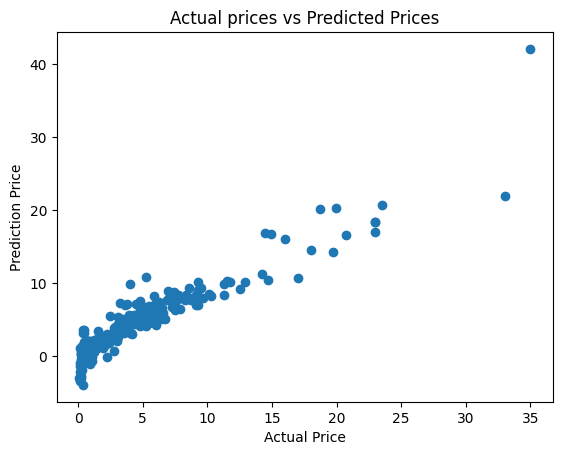

In [21]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual prices vs Predicted Prices")
plt.show()

In [22]:
#Prediction on Test data
test_data_pred=lin_reg_model.predict(x_test)

In [23]:
#R squared error
error_score_test= metrics.r2_score(y_test,test_data_pred)
print("R squared error:-",error_score_test)

R squared error:- 0.8457083515141308


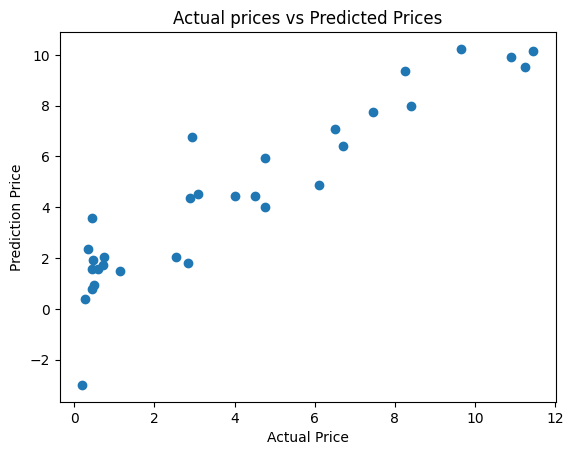

In [24]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual prices vs Predicted Prices")
plt.show()

### 2.Lasso Regression

In [25]:
#Loading the lasso Regression Model
lass_reg_model = Lasso()

In [26]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [27]:
#Prediction on Training Data
training_data_pred=lass_reg_model.predict(x_train)

In [28]:
#R squared error
error_score_training= metrics.r2_score(y_train,training_data_pred)
print("R squared error:-",error_score_training)

R squared error:- 0.8429559908601505


## Visualize the actual prices and Prediction prices

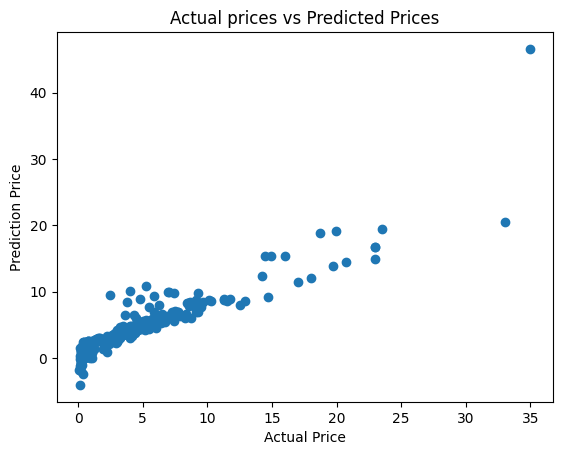

In [29]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual prices vs Predicted Prices")
plt.show()

In [30]:
#Prediction on Test data
test_data_pred=lass_reg_model.predict(x_test)

In [31]:
#R squared error
error_score_test= metrics.r2_score(y_test,test_data_pred)
print("R squared error:-",error_score_test)

R squared error:- 0.8755568692302514


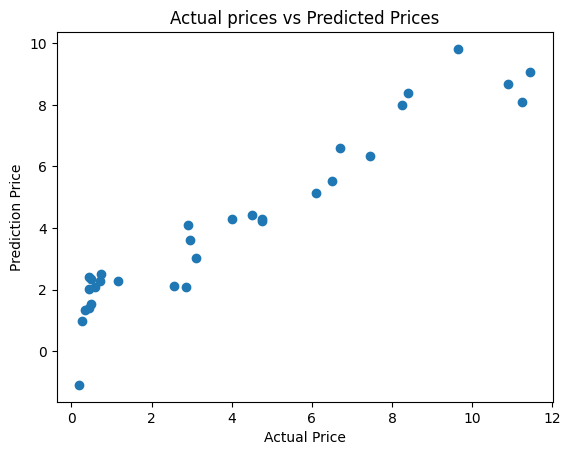

In [32]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual prices vs Predicted Prices")
plt.show()

# Predict The Price

In [33]:
x_train.head(1)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
204,89,2015,4.43,28282,0,0,0,0


In [34]:
input_data_model=pd.DataFrame(
    [[89,2015,4.43,5624,0,0,0,0]],
    columns=['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'])

In [35]:
input_data_model

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,89,2015,4.43,5624,0,0,0,0


In [36]:
lin_reg_model.predict(input_data_model)

array([4.0229018])

In [37]:
import pickle

In [38]:
#save model
with open("Car_price_prediction_model.pkl","wb") as f:
    pickle.dump(lin_reg_model, f)

print("Succes")

Succes
